In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [14]:
# step 1 - importing data

df = pd.read_csv(r"C:\Users\Windows\6 - Project\Prepared Data\cleaned_subset.csv", index_col=0)

In [15]:
df.head()

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rating
0,1419,1565,Little Portugal,43.64590,-79.42423,Entire home/apt,120.0,28,6,2017-08-07,0.06,1,0,0,5.00
1,26654,113345,Waterfront Communities-The Island,43.64608,-79.39032,Entire home/apt,145.0,28,42,2023-09-01,0.27,5,77,2,4.79
2,27423,118124,South Riverdale,43.66884,-79.32725,Entire home/apt,75.0,90,28,2023-08-31,0.17,1,215,1,4.93
3,40456,174063,South Parkdale,43.63539,-79.44010,Entire home/apt,150.0,750,113,2023-06-19,0.69,4,364,2,4.64
4,43964,192364,Wexford/Maryvale,43.74922,-79.29188,Entire home/apt,195.0,1,67,2023-09-25,0.78,1,364,13,4.96


In [19]:
# 2 -  Pick out variablesthat are suitable for data analysis. 
df1 = df.drop(columns = ['id', 'host_id', 'last_review', 'neighbourhood', 'room_type'])

In [20]:
df1.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rating
0,43.64590,-79.42423,120.0,28,6,0.06,1,0,0,5.00
1,43.64608,-79.39032,145.0,28,42,0.27,5,77,2,4.79
2,43.66884,-79.32725,75.0,90,28,0.17,1,215,1,4.93
3,43.63539,-79.44010,150.0,750,113,0.69,4,364,2,4.64
4,43.74922,-79.29188,195.0,1,67,0.78,1,364,13,4.96


In [23]:
# 3 Create a correlation matrix heatmap (colored) 
# Discuss what the coefficients in the plot mean in terms of the relationships between the variables

corr = df1.corr()

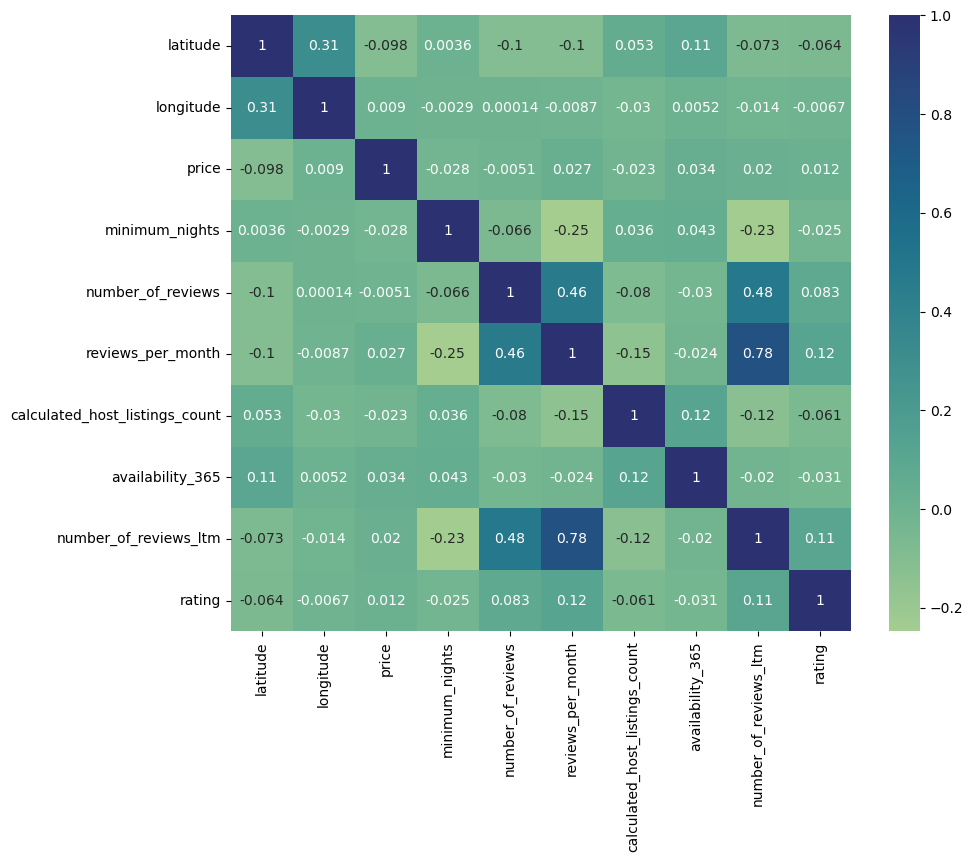

In [25]:
# Create a correlation matrix heatmap 

plt.figure(figsize=(10, 8)) 
sns.heatmap(corr, 
            xticklabels=corr.columns, 
            yticklabels=corr.columns, 
            annot=True,    # Adds correlation values to the heatmap
            cmap='crest')  # Color scheme

plt.show()


In [26]:
# The coefficients indicate the degree of correlation between each pair of variables. Correlation of 1 means the variables are just being compared to themselves.
#There isn't any major relationship that stands out except for reviews_per_month and number_of_reviews_ltm 

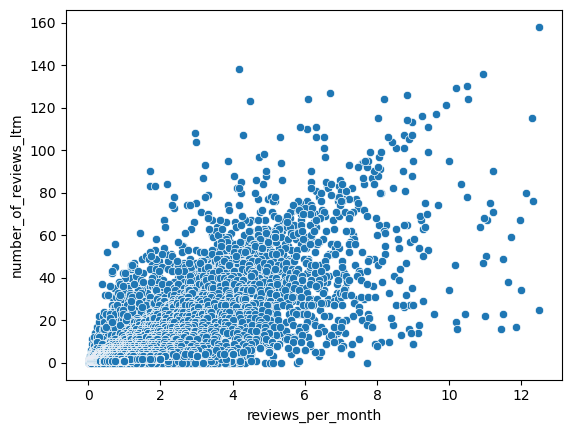

In [28]:
# 4 reate a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.
# Discuss the output in a markdown cell.


scatter = sns.scatterplot(x='reviews_per_month', y='number_of_reviews_ltm', data = df1)
plt.show()

#### There is a strong correlation between reviews per month and number of reviews in the last 12 months. It means the more  reviews a property has every month, there is a strong likelihood that the property will have more reviews in the past one year. This result is not surprising.

C:\Users\Windows\Anaconda3_new\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


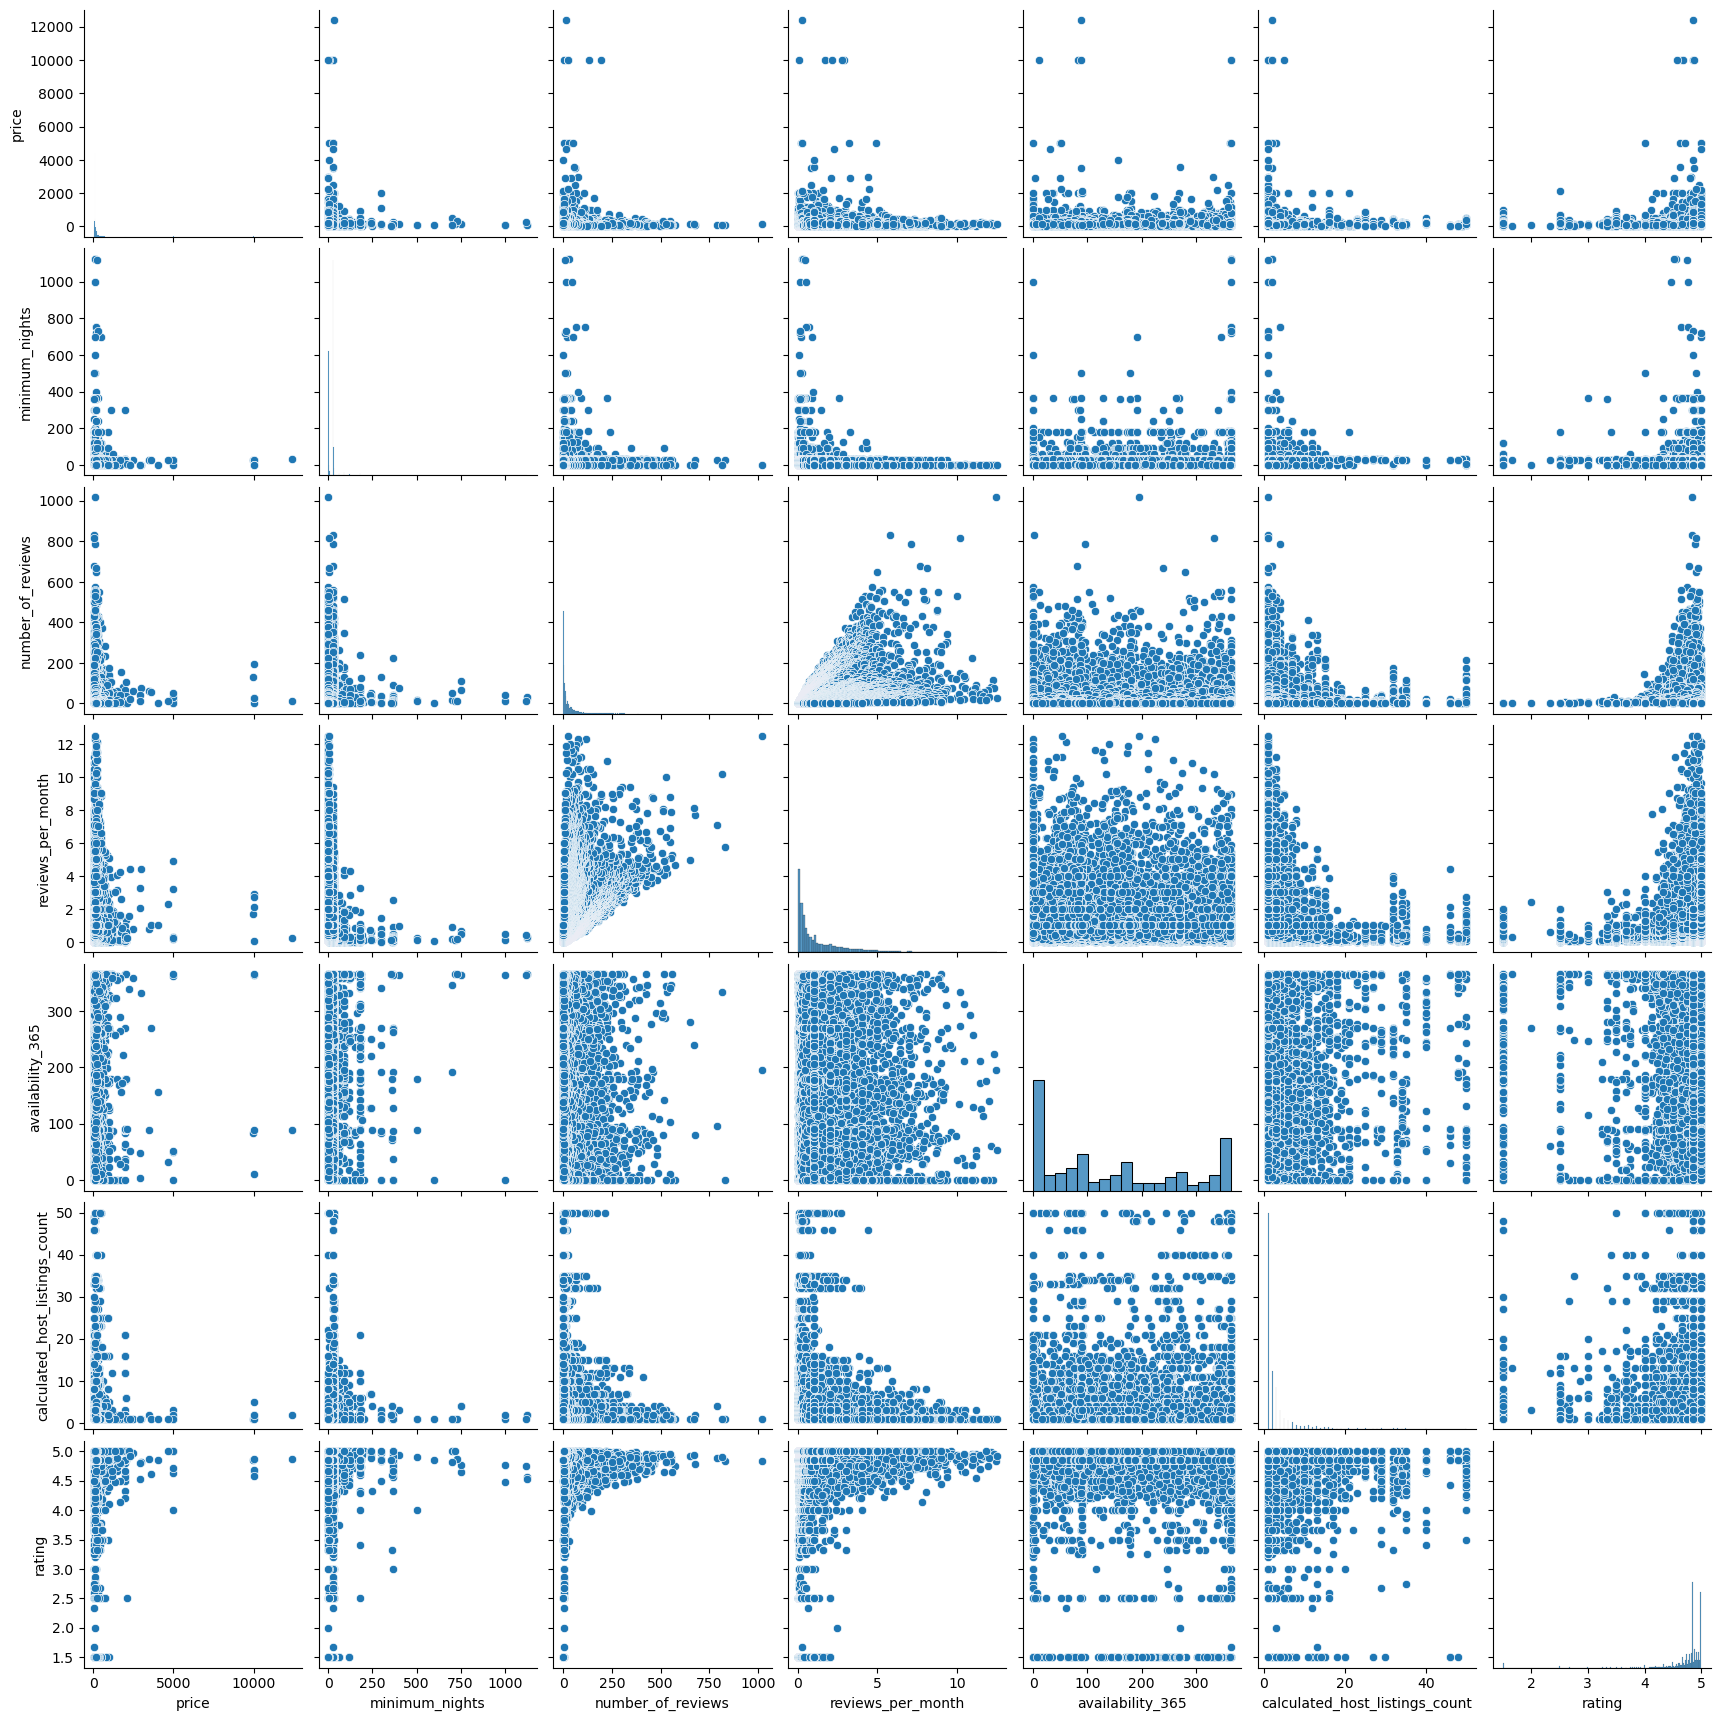

In [59]:
# 5 Create a pair plot of the entire data set.
# Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.


sub = df1[['price','minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365', 'calculated_host_listings_count','rating']]
g = sns.pairplot(sub)
plt.show()

### Based on the pairplot, several observations can be made from the numerical variables.

#### 1) There may be a weak positive relationship between the rating and the price. The higher the rating, the more expensive the rental.
#### 2) There may be a weak inverse relationship between the number of reviews and the price.  The more reviews for a property, the less expensive.
#### 3) There may be an inverse relationship between the minimum number of nights and the price.  The longer the stay, the cheaper the price.

In [36]:
# 6 Create a categorical plot and interpret the results.

df['room_type'].value_counts()

room_type
Entire home/apt    9941
Private room       5069
Shared room          97
Hotel room            1
Name: count, dtype: int64

In [37]:
df['neighbourhood'].value_counts()

neighbourhood
Waterfront Communities-The Island    2425
Niagara                               604
Annex                                 492
Trinity-Bellwoods                     399
Church-Yonge Corridor                 395
                                     ... 
Bridle Path-Sunnybrook-York Mills      14
Humber Summit                          14
Elms-Old Rexdale                       10
Rustic                                 10
Kingsway South                          8
Name: count, Length: 140, dtype: int64

C:\Users\Windows\Anaconda3_new\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


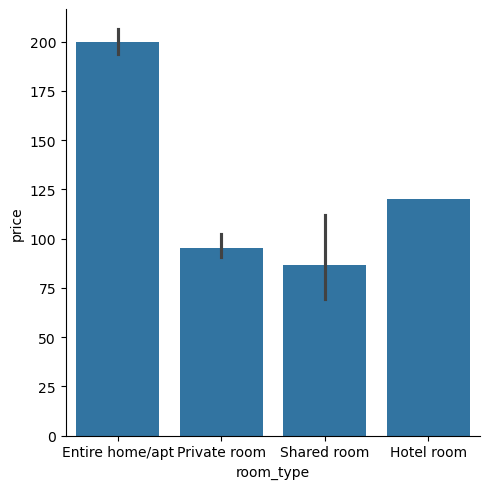

In [56]:
# Create a categorical plot and interpret the results

sns.catplot(x='room_type', y="price", data=df, kind='bar')
plt.show()

C:\Users\Windows\Anaconda3_new\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


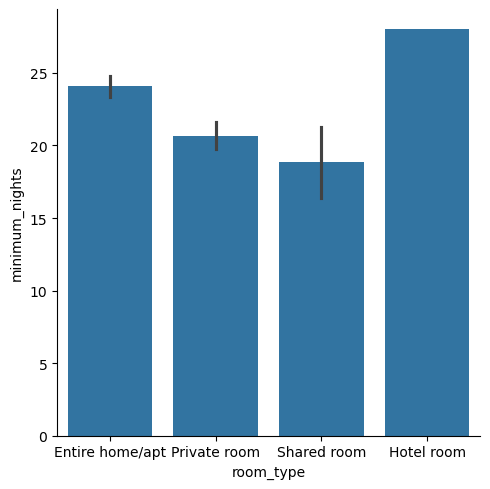

In [57]:
sns.catplot(x='room_type', y="minimum_nights", data=df, kind='bar')
plt.show()

### In terms of price, Entire home/apt on average are the most expensive to rent, followed by hotel room, private room, and shared room 

### In terms of minimum nights, customers spend the most number of nights in hotel rooms. Entire home/apt have the second highest minimum number of nights, followed by private room and shared room. 

### 7  One question posed in Task 6.1  is : Is there a correlation between the number of reviews and rating of each Airbnb rental?

#### There appears to a weak correlation between number of reviews or reviews per month and rating.This hypothesis will stand. 

####  There are no pairs of variables that stand out from the correlationship matrix.

### The questions to be added are the 3 observations I made from pair plots. 

#### 1)  There may be a weak positive relationship between the rating and the price. The higher the rating, the more expensive the rental.
####  2)  There may be a weak inverse relationship between the number of reviews and the price. The more reviews for a property, the less expensive.
####  3) There may be an inverse relationship between the minimum number of nights and the price. The longer the stay, the cheaper the price.¶

### 8 As a result of my exploratory visualizations and Task 6.1, I would like to further explore the following hypotheses: 

#### The higher the rating, the more reviews the rental has. There may be a weak relationship.  

#### There may be a weak positive relationship between the rating and the price. The higher the rating, the more expensive the rental.

#### There may be a weak inverse relationship between the number of reviews and the price. The more reviews for a property, the less expensive.

#### There may be an inverse relationship between the minimum number of nights and the price. The longer the stay, the cheaper the price.¶¶


#### Note:  Another categorical variable that was not explored is the neighbourhood variable. Due to the large number of categories under this variable, we will explore these neighborhoods in great detail in the geographical visualizations in an upcoming unit. 
